# colab 환경에서 pycaret 설치

In [ ]:
!pip install pycaret -q

# 필요 패키지 호출

In [ ]:
import pandas as pd
import numpy as np

# 총 데이터셋 호출

In [ ]:
data = pd.read_csv(r"{데이터셋 링크 작성}")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5331 entries, 0 to 5330
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5331 non-null   int64  
 1   name                    5331 non-null   object 
 2   intro                   5331 non-null   object 
 3   content_num             5331 non-null   int64  
 4   followers               5331 non-null   int64  
 5   following               5331 non-null   int64  
 6   content_text            5331 non-null   object 
 7   content_time            5331 non-null   object 
 8   num_photo               5331 non-null   int64  
 9   content_like            5331 non-null   int64  
 10  reply_tot               5331 non-null   int64  
 11  reply                   5331 non-null   object 
 12  reply_time              5331 non-null   object 
 13  hash_tag                5331 non-null   object 
 14  hash_tag_num            5331 non-null   

In [ ]:
data.columns

Index(['Unnamed: 0', 'name', 'intro', 'content_num', 'followers', 'following',
       'content_text', 'content_time', 'num_photo', 'content_like',
       'reply_tot', 'reply', 'reply_time', 'hash_tag', 'hash_tag_num',
       'mention_name', 'pre_content', 'promotion', 'content_text_len',
       'promo_content_num', 'nopromo_content_num', 'react_time',
       'react_time_min', 'react_term', 'react_time_min_minute',
       'react_term_minute', 'date_weight', 'mention', 'all_con_like_mean',
       'all_con_rp_mean', 'promo_con_like_mean', 'promo_rp_mean',
       'nopromo_con_like_mean', 'nopromo_rp_mean', 'con_score',
       'con_score_mean', 'success', 'con_weekday', 'con_hour',
       'con_num_weighted', 'promo_con_num_weighted', 'react_min_minute__mean',
       'scale', 'channel', 'br_in_rp', 'kw_in_rp', 'kw_in_con', 'key_rp',
       'key_rp_percent'],
      dtype='object')

# 데이터 전처리

In [ ]:
grouped_df=data.loc[:,['name', 'intro', 'content_num', 'followers', 'following',
       'content_text', 'content_time', 'num_photo', 'content_like',
       'reply_tot', 'reply', 'reply_time', 'hash_tag', 'hash_tag_num',
       'mention_name', 'pre_content', 'promotion', 'content_text_len',
       'promo_content_num', 'nopromo_content_num', 'react_time',
       'react_time_min', 'react_term', 'react_time_min_minute',
       'react_term_minute', 'date_weight', 'mention', 'all_con_like_mean',
       'all_con_rp_mean', 'promo_con_like_mean', 'promo_rp_mean',
       'nopromo_con_like_mean', 'nopromo_rp_mean', 'con_score',
       'con_score_mean', 'con_weekday', 'con_hour',
       'con_num_weighted', 'promo_con_num_weighted', 'react_min_minute__mean',
       'scale', 'channel', 'br_in_rp', 'kw_in_rp', 'kw_in_con', 'key_rp',
       'key_rp_percent', 'success']]
grouped_df.tail()

,name,intro,content_num,followers,following,content_text,content_time,num_photo,content_like,reply_tot,...,promo_con_num_weighted,react_min_minute__mean,scale,channel,br_in_rp,kw_in_rp,kw_in_con,key_rp,key_rp_percent,success
5326,sh_nn,No Seung Hyuk\n모델\n세종대학교 학사👨🏻‍🎓\ncontemporary ...,401,88000,1032,#유료광고\n가을스러운 무신사\n\n#무신사스탠다드 #무신사 #릴렉스드데님트러커재킷...,2021-09-20 12:07:30,2,1208,12,...,88.795727,11.127867,1.0,0.0,0,1,9,1,0.083333,0
5327,sh_nn,No Seung Hyuk\n모델\n세종대학교 학사👨🏻‍🎓\ncontemporary ...,401,88000,1032,#광고 여름 속의 이른 겨울준비 ~ ❄️☃️\n\n- 뉴발란스 팝업스토어에서 21F...,2021-08-27 07:49:06,8,1526,21,...,87.343314,11.127867,1.0,0.0,1,3,17,1,0.047619,0
5328,ggarinam,나는야이자운\n디지털 크리에이터\n내특기: 엄마말안듣기\n우리가족 사는이야기💖,366,185000,170,#광고 랑맥피자\n뿌이뿌이뿌이~~🥳\n우리아 오통통한 고사리손으로\n직.접 만든피자...,2023-05-05 04:03:35,0,8343,101,...,2.883138,1.555556,2.0,0.0,9,14,3,12,0.118812,0
5329,ggarinam,나는야이자운\n디지털 크리에이터\n내특기: 엄마말안듣기\n우리가족 사는이야기💖,366,185000,170,#광고 @isaactoast.official\n우리아가 토스트를 하도 야무지게 무니...,2023-04-29 02:50:03,0,74000,306,...,2.823586,1.555556,2.0,0.0,19,72,11,63,0.205882,1
5330,ggarinam,나는야이자운\n디지털 크리에이터\n내특기: 엄마말안듣기\n우리가족 사는이야기💖,366,185000,170,할머니한테 비밀이래여\n비밀 지키주이소 ~~ 🫶🏻\n\n아찻차!!!!!! 느무 증신...,2023-02-14 13:44:59,0,37000,195,...,2.099794,1.555556,2.0,0.0,14,39,3,30,0.153846,1


In [ ]:
grouped_df[grouped_df['num_photo']==0]['num_photo']=grouped_df[grouped_df['num_photo']==0]['num_photo'].apply(lambda x: 1)

In [ ]:
grouped_df.loc[grouped_df['content_like']==-1 ,"content_like"]=grouped_df.loc[grouped_df['content_like']==-1 ,"all_con_like_mean"]
grouped_df.loc[grouped_df['content_like']==-1 ,"content_like"]

Series([], Name: content_like, dtype: float64)

In [ ]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5331 entries, 0 to 5330
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    5331 non-null   object 
 1   intro                   5331 non-null   object 
 2   content_num             5331 non-null   int64  
 3   followers               5331 non-null   int64  
 4   following               5331 non-null   int64  
 5   content_text            5331 non-null   object 
 6   content_time            5331 non-null   object 
 7   num_photo               5331 non-null   int64  
 8   content_like            5331 non-null   float64
 9   reply_tot               5331 non-null   int64  
 10  reply                   5331 non-null   object 
 11  reply_time              5331 non-null   object 
 12  hash_tag                5331 non-null   object 
 13  hash_tag_num            5331 non-null   int64  
 14  mention_name            5331 non-null   

## 필요 패키지 호출

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## 가중치 더한 engagement 계산식으로 얻은 정답 컬럼

In [ ]:
grouped_df['y']=(grouped_df['content_like']*2.23+(grouped_df['reply_tot'])*2.576+grouped_df['mention']*2.041)*100 /(grouped_df['followers']*grouped_df['date_weight'])
grouped_df.columns

Index(['name', 'intro', 'content_num', 'followers', 'following',
       'content_text', 'content_time', 'num_photo', 'content_like',
       'reply_tot', 'reply', 'reply_time', 'hash_tag', 'hash_tag_num',
       'mention_name', 'pre_content', 'promotion', 'content_text_len',
       'promo_content_num', 'nopromo_content_num', 'react_time',
       'react_time_min', 'react_term', 'react_time_min_minute',
       'react_term_minute', 'date_weight', 'mention', 'all_con_like_mean',
       'all_con_rp_mean', 'promo_con_like_mean', 'promo_rp_mean',
       'nopromo_con_like_mean', 'nopromo_rp_mean', 'con_score',
       'con_score_mean', 'con_weekday', 'con_hour', 'con_num_weighted',
       'promo_con_num_weighted', 'react_min_minute__mean', 'scale', 'channel',
       'br_in_rp', 'kw_in_rp', 'kw_in_con', 'key_rp', 'key_rp_percent',
       'success', 'y'],
      dtype='object')

## 데이터 분리

### x_insta 분리

In [ ]:
x_insta = grouped_df.loc[:, ['content_num', 'following', 'num_photo', 'reply_tot', 'hash_tag_num',
                      'content_text_len', 'promo_content_num', 'nopromo_content_num',
                      'react_time_min_minute', 'kw_in_con', 'all_con_like_mean', 'all_con_rp_mean', 
                      'key_rp', 'key_rp_percent','react_term_minute', 'channel', 'scale']]

x_insta

,content_num,following,num_photo,reply_tot,hash_tag_num,content_text_len,promo_content_num,nopromo_content_num,react_time_min_minute,kw_in_con,all_con_like_mean,all_con_rp_mean,key_rp,key_rp_percent,react_term_minute,channel,scale
0,609,496,6,38,9,184,361,248,0.283333,26,2128.947189,63.611584,31,0.815789,1056.850000,0.0,2.0
1,609,496,5,45,11,106,361,248,0.216667,7,2128.947189,63.611584,32,0.711111,460.433333,0.0,2.0
2,609,496,6,78,8,443,361,248,0.250000,12,2128.947189,63.611584,20,0.256410,275.150000,0.0,2.0
3,609,496,6,64,14,141,361,248,0.266667,7,2128.947189,63.611584,41,0.640625,1403.550000,0.0,2.0
4,609,496,4,66,5,89,361,248,0.300000,6,2128.947189,63.611584,47,0.712121,1216.033333,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5326,401,1032,2,12,10,79,125,276,1.250000,9,2853.189415,41.013928,1,0.083333,717.383333,0.0,1.0
5327,401,1032,8,21,15,317,125,276,2.100000,17,2853.189415,41.013928,1,0.047619,1083.000000,0.0,1.0
5328,366,170,0,101,3,224,3,363,2.033333,3,18386.390935,88.368272,12,0.118812,1170.583333,0.0,2.0
5329,366,170,0,306,4,423,3,363,1.400000,11,18386.390935,88.368272,63,0.205882,1362.683333,0.0,2.0


### y_insta 분리

In [ ]:
y_insta=grouped_df.loc[:,['y']]

### x_train 분리
pycaret에 넣을 데이터에 정답 컬럼 필요하므로 'y' 포함시킴

In [ ]:
x_train = grouped_df.loc[:, ['content_num', 'following', 'num_photo', 'reply_tot', 'hash_tag_num',
                      'content_text_len', 'promo_content_num', 'nopromo_content_num',
                      'react_time_min_minute', 'kw_in_con', 'all_con_like_mean', 'all_con_rp_mean', 
                      'key_rp', 'key_rp_percent','react_term_minute', 'channel', 'scale', 'y']]

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(
    x_insta,    # 문제 --> train/val
    y_insta,    # 정답지
    test_size= 0.2, # train 데이터 중에서 20프로만 중간 검사용으로 빼두자..
    random_state= 1234, # 옵션 : 나중에 재현성을 위해서 seed값.
    # 옵션 : 나눌 때 비율을 유지할지 말지....
)

## 특정 컬럼 라벨 인코딩

In [ ]:
cols = ["channel","scale"]
for col in cols:
    le = LabelEncoder() 
    x_train.loc[:,col] = le.fit_transform(x_train.loc[:,col])
    x_test.loc[:,col]=le.transform(x_test.loc[:,col])

## 특정 컬럼 int로 형 변환

In [ ]:
x_train = x_train.astype({'channel':'int', 'scale':'int'})
X_train = X_train.astype({'channel':'int', 'scale':'int'})
x_test = x_test.astype({'channel':'int', 'scale':'int'})

## test셋 만들기

In [ ]:
test_df = pd.concat([x_test, y_test], axis=1)

In [ ]:
test_df

,content_num,following,num_photo,reply_tot,hash_tag_num,content_text_len,promo_content_num,nopromo_content_num,react_time_min_minute,kw_in_con,all_con_like_mean,all_con_rp_mean,key_rp,key_rp_percent,react_term_minute,channel,scale,y
1477,337,368,5,11,6,215,76,261,0.900000,18,1727.830258,7.833948,2,0.181818,467.700000,1,0,3.705912
3602,308,343,5,15,20,131,50,258,2.366667,7,5341.806723,23.823529,4,0.266667,472.900000,0,0,16.432197
199,609,496,5,66,12,421,361,248,0.266667,9,2128.947189,63.611584,13,0.196970,346.350000,0,1,5.239463
1457,337,368,8,5,5,109,76,261,2.533333,4,1727.830258,7.833948,0,0.000000,1433.450000,1,0,2.755803
545,1722,261,8,4,27,650,1001,721,58.066667,41,1315.618990,8.194111,2,0.500000,20.900000,1,1,0.321341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4317,891,1829,3,184,4,440,419,472,1.066667,20,834.256208,158.150113,117,0.635870,158.933333,0,0,78.954475
1324,1722,261,6,2,3,255,1001,721,0.583333,12,1315.618990,8.194111,0,0.000000,109.933333,1,1,1.908146
3734,899,7505,10,221,8,417,195,704,8.350000,5,1444.542105,95.880702,106,0.479638,539.333333,1,1,3.507909
2158,260,1990,4,80,15,178,191,69,3.016667,11,955.093750,69.003906,47,0.587500,1278.750000,0,0,25.987348


## 학습 전 train셋 확인

In [ ]:
x_train

,content_num,following,num_photo,reply_tot,hash_tag_num,content_text_len,promo_content_num,nopromo_content_num,react_time_min_minute,kw_in_con,all_con_like_mean,all_con_rp_mean,key_rp,key_rp_percent,react_term_minute,channel,scale,y
0,609,496,6,38,9,184,361,248,0.283333,26,2128.947189,63.611584,31,0.815789,1056.850000,0,1,3.182324
1,609,496,5,45,11,106,361,248,0.216667,7,2128.947189,63.611584,32,0.711111,460.433333,0,1,4.167388
2,609,496,6,78,8,443,361,248,0.250000,12,2128.947189,63.611584,20,0.256410,275.150000,0,1,6.398869
3,609,496,6,64,14,141,361,248,0.266667,7,2128.947189,63.611584,41,0.640625,1403.550000,0,1,3.821614
4,609,496,4,66,5,89,361,248,0.300000,6,2128.947189,63.611584,47,0.712121,1216.033333,0,1,4.314545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5326,401,1032,2,12,10,79,125,276,1.250000,9,2853.189415,41.013928,1,0.083333,717.383333,0,0,4.362018
5327,401,1032,8,21,15,317,125,276,2.100000,17,2853.189415,41.013928,1,0.047619,1083.000000,0,0,5.622204
5328,366,170,0,101,3,224,3,363,2.033333,3,18386.390935,88.368272,12,0.118812,1170.583333,0,1,10.692167
5329,366,170,0,306,4,423,3,363,1.400000,11,18386.390935,88.368272,63,0.205882,1362.683333,0,1,95.337152


# pycaret 회귀 모듈 호출

In [ ]:
from pycaret.regression import *

# 학습

## 모델 학습 설정

In [ ]:
reg_test_1 = setup(data=x_train,
                   target='y',
                   train_size= 0.8,
                   fold=5)

,Description,Value
0,Session id,714
1,Target,y
2,Target type,Regression
3,Original data shape,"(5331, 18)"
4,Transformed data shape,"(5331, 18)"
5,Transformed train set shape,"(4264, 18)"
6,Transformed test set shape,"(1067, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


## RMSE 기반으로 모델 비교

In [ ]:
best_model = compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,5.2921,257.8972,15.7533,0.4095,0.5982,2.3103,2.8980
lightgbm,Light Gradient Boosting Machine,5.8318,259.6646,15.8305,0.4071,0.6806,2.7331,0.4000
et,Extra Trees Regressor,5.3680,264.2983,15.9884,0.3926,0.6057,2.3070,1.4980
gbr,Gradient Boosting Regressor,5.7492,276.3462,16.3873,0.3584,0.6539,2.7173,0.9820
xgboost,Extreme Gradient Boosting,5.6295,277.6595,16.4291,0.3516,0.6516,2.4544,1.3540
knn,K Neighbors Regressor,6.7617,330.8900,17.9790,0.2300,0.7496,2.4977,0.1220
lr,Linear Regression,8.5628,348.1328,18.4106,0.1954,0.8817,2.9707,0.7580
ridge,Ridge Regression,8.5612,348.1296,18.4106,0.1954,0.8816,2.9706,0.0500
br,Bayesian Ridge,8.5011,348.2301,18.4147,0.1949,0.8767,2.9725,0.0940
lasso,Lasso Regression,8.6125,358.1620,18.6877,0.1702,0.9005,3.3237,0.0680


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## 모델 만들기

### lightgbm 모델 만들기

In [ ]:
top1 = create_model('lightgbm', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,5.6660,144.6860,12.0285,0.4975,0.6540,2.1250


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### rf 모델 만들기

In [ ]:
top2 = create_model('rf', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,5.3092,185.1469,13.6069,0.3570,0.5934,2.1113


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### xgboost 모델 만들기

In [ ]:
top3 = create_model('xgboost', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,5.8569,215.3145,14.6736,0.2522,0.6578,2.4981


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(tuned_lgbm)

LGBMRegressor(bagging_fraction=0.7, bagging_freq=2, feature_fraction=0.6,
              learning_rate=0.05, min_child_samples=51, min_split_gain=0.6,
              n_estimators=120, num_leaves=50, random_state=714, reg_alpha=0.01,
              reg_lambda=1)


## 모델 튜닝

### lgbm 튜닝

In [ ]:
tuned_lgbm = tune_model(top1, optimize = 'RMSE', n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.3192,170.7194,13.0660,0.4894,0.6292,3.6874
1,5.4220,208.6048,14.4432,0.4390,0.6338,3.2847
2,5.8318,309.1244,17.5819,0.3892,0.6542,2.6964
3,5.4138,148.9887,12.2061,0.4923,0.6268,1.5567
4,6.2613,442.1281,21.0268,0.3018,0.6855,2.2209
Mean,5.6496,255.9131,15.6648,0.4224,0.6459,2.6892
Std,0.3533,108.1077,3.2446,0.0711,0.0220,0.7554


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


### lgbm 튜닝 모델 feature importance

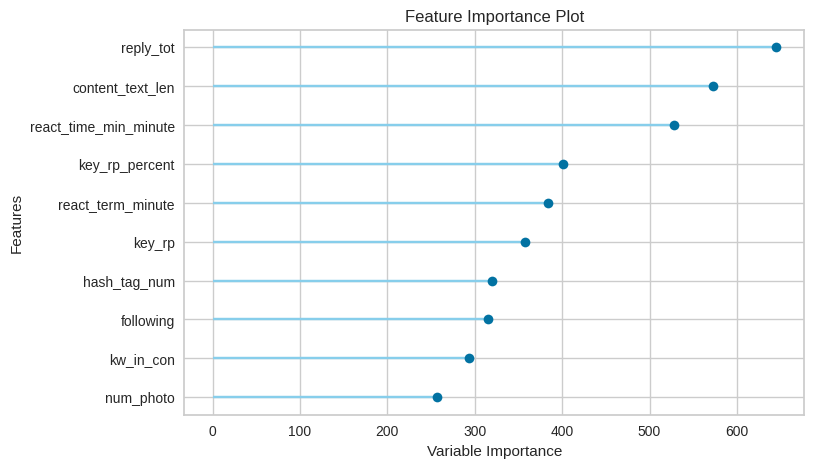

In [ ]:
plot_model(tuned_lgbm, plot='feature')

### lgbm 튜닝 모델 저장

In [ ]:
save_model(model=tuned_lgbm, 
           model_name='final_lgbm2',
           verbose=False)

(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['content_num', 'following',
                                              'num_photo', 'reply_tot',
                                              'hash_tag_num', 'content_text_len',
                                              'promo_content_num',
                                              'nopromo_content_num',
                                              'react_time_min_minute',
                                              'kw_in_con', 'all_con_like_mean',
                                              'all_con_rp_mean', 'key_rp',
                                              'key_rp_percent',
                                              'react_term_minute'...
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                             

### rf 튜닝 모델

In [ ]:
tuned_rf = tune_model(top2, optimize = 'RMSE', n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.9909,158.3893,12.5853,0.5263,0.6052,3.4008
1,5.4046,218.4947,14.7816,0.4124,0.6647,3.5419
2,5.2716,273.3005,16.5318,0.4599,0.6167,2.2053
3,5.0772,141.4436,11.8930,0.5180,0.5959,1.5953
4,5.9731,441.0381,21.0009,0.3036,0.6635,2.1293
Mean,5.3435,246.5332,15.3585,0.4441,0.6292,2.5745
Std,0.3466,107.8406,3.2633,0.0815,0.0293,0.7631


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
print(tuned_rf)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt',
                      min_impurity_decrease=0.1, min_samples_leaf=4,
                      min_samples_split=9, n_estimators=60, n_jobs=-1,
                      random_state=714)


### rf 튜닝 모델 feature importance

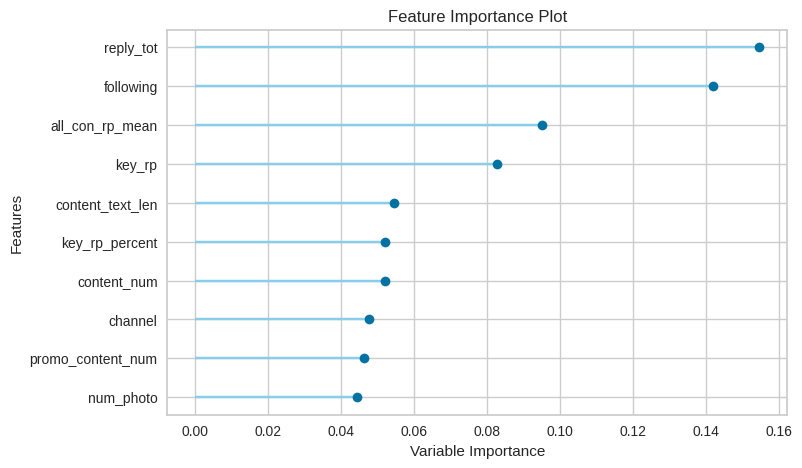

In [ ]:
plot_model(tuned_rf, plot='feature')

### rf 튜닝 모델 저장

In [ ]:
save_model(model=tuned_rf, 
           model_name='final_rf2',
           verbose=False)

(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['content_num', 'following',
                                              'num_photo', 'reply_tot',
                                              'hash_tag_num', 'content_text_len',
                                              'promo_content_num',
                                              'nopromo_content_num',
                                              'react_time_min_minute',
                                              'kw_in_con', 'all_con_like_mean',
                                              'all_con_rp_mean', 'key_rp',
                                              'key_rp_percent',
                                              'react_term_minute'...nel',
                                              'scale'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                 

### xgboost 튜닝 모델

In [ ]:
tuned_xgb = tune_model(top3, optimize = 'RMSE', n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.6456,196.7948,14.0284,0.4115,0.6495,3.4230
1,5.9162,248.0030,15.7481,0.3331,0.6911,3.8941
2,5.7584,287.8240,16.9654,0.4313,0.6615,2.7536
3,5.6109,182.8202,13.5211,0.3770,0.6299,1.4866
4,6.7456,490.2509,22.1416,0.2259,0.7266,2.4865
Mean,5.9354,281.1386,16.4809,0.3557,0.6717,2.8087
Std,0.4189,111.0414,3.0851,0.0730,0.0339,0.8259


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
print(tuned_xgb)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=714, ...)


### xgboost 튜닝 모델 저장

In [ ]:
save_model(model=tuned_xgb, 
           model_name='final_xgb2',
           verbose=False)

(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['content_num', 'following',
                                              'num_photo', 'reply_tot',
                                              'hash_tag_num', 'content_text_len',
                                              'promo_content_num',
                                              'nopromo_content_num',
                                              'react_time_min_minute',
                                              'kw_in_con', 'all_con_like_mean',
                                              'all_con_rp_mean', 'key_rp',
                                              'key_rp_percent',
                                              'react_term_minute'...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interacti

### xgboost 튜닝 모델 feature importance

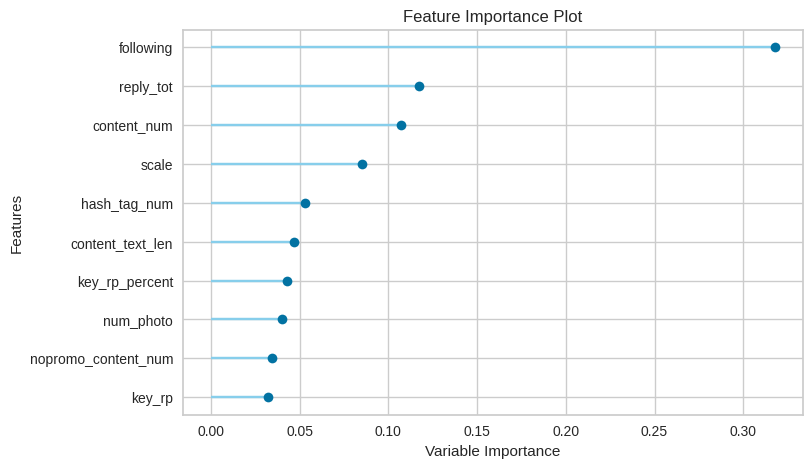

In [ ]:
plot_model(tuned_xgb, plot='feature')

# 모델 blending = voting

In [ ]:
blender_specific = blend_models(estimator_list = [tuned_lgbm, tuned_rf, tuned_xgb],optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.8431,156.3285,12.5031,0.5325,0.5774,3.2535
1,5.0735,203.0699,14.2503,0.4539,0.6138,3.1306
2,5.2269,275.2923,16.5919,0.4560,0.6098,2.4440
3,4.9800,146.2409,12.0930,0.5017,0.5837,1.5776
4,5.8088,432.7171,20.8019,0.3167,0.6450,2.0787
Mean,5.1865,242.7297,15.2480,0.4522,0.6059,2.4969
Std,0.3353,105.3600,3.1980,0.0738,0.0241,0.6320


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# 최종 모델 선정 및 test셋에 대한 예측 결과 확인

In [ ]:
final_model = finalize_model(blender_specific)
pred = predict_model(final_model, data=test_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,3.2224,61.2877,7.8286,0.8252,0.4434,1.5618


## 최종 모델 정보

In [ ]:
print(blender_specific)

VotingRegressor(estimators=[('Light Gradient Boosting Machine',
                             LGBMRegressor(bagging_fraction=0.7, bagging_freq=2,
                                           feature_fraction=0.6,
                                           learning_rate=0.05,
                                           min_child_samples=51,
                                           min_split_gain=0.6, n_estimators=120,
                                           num_leaves=50, random_state=714,
                                           reg_alpha=0.01, reg_lambda=1)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(bootstrap=False,
                                                   max_depth=10,
                                                   max_fe...
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_co

In [ ]:
blender_specific

VotingRegressor(estimators=[('Light Gradient Boosting Machine',
                             LGBMRegressor(bagging_fraction=0.7, bagging_freq=2,
                                           feature_fraction=0.6,
                                           learning_rate=0.05,
                                           min_child_samples=51,
                                           min_split_gain=0.6, n_estimators=120,
                                           num_leaves=50, random_state=714,
                                           reg_alpha=0.01, reg_lambda=1)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(bootstrap=False,
                                                   max_depth=10,
                                                   max_fe...
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=-1,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=714, ...))],
                n_jobs=-1)

## 최종 모델 저장

In [ ]:
save_model(model=final_model, 
           model_name='final_model',
           verbose=False)

(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['content_num', 'following',
                                              'num_photo', 'reply_tot',
                                              'hash_tag_num', 'content_text_len',
                                              'promo_content_num',
                                              'nopromo_content_num',
                                              'react_time_min_minute',
                                              'kw_in_con', 'all_con_like_mean',
                                              'all_con_rp_mean', 'key_rp',
                                              'key_rp_percent',
                                              'react_term_minute'...
                                                            grow_policy=None,
                                                            importance_type=None,
                           

## 예측 결과 csv로 저장

In [ ]:
pred.to_csv('pred1.csv')

In [ ]:
print(pred)

      content_num  following  num_photo  reply_tot  hash_tag_num  \
1477          337        368          5         11             6   
3602          308        343          5         15            20   
199           609        496          5         66            12   
1457          337        368          8          5             5   
545          1722        261          8          4            27   
...           ...        ...        ...        ...           ...   
4317          891       1829          3        184             4   
1324         1722        261          6          2             3   
3734          899       7505         10        221             8   
2158          260       1990          4         80            15   
1771          467        734          7         35             7   

      content_text_len  promo_content_num  nopromo_content_num  \
1477               215                 76                  261   
3602               131                 50          

# 최종 모델 불러오기

In [ ]:
import pickle
final_lgbm = pickle.load(open('/content/drive/MyDrive/final_lgbm.pkl', 'rb'))

In [ ]:
import joblib
joblib.dump(final_lgbm, "/content/drive/MyDrive/final_lgbm.pkl")

['/content/drive/MyDrive/final_lgbm.pkl']

In [ ]:
# # 모델 학습
# tuned_top5 = [tune_model(i, optimize = 'F1') for i in best_model]
# blender_top5 = blend_models(estimator_list=tuned_top5)

# final_model = finalize_model(blender_top5)

In [ ]:
# # 모델 검증
# evaluate_model(final_model)

In [ ]:
# pred = predict_model(final_model, data = train_df[4650:])
# pred